![dssg_banner](src/assets/dssg_banner.png)

# Exploring the Land Sealing Application Dataset
This project executes a pipeline which yields a complex dataset regarding land sealing applications across Germany. 
This notebook is intended to help users understand how to extract the final forms of these datasets and apply analysis.

---------

## Getting Started
#### Setup Colab environment

If you installed the packages and requirments on your own machine, you can skip this section and start from the import section. Otherwise you can follow and execute the tutorial on your browser. In order to start working on the notebook, click on the following button, this will open this page in the Colab environment and you will be able to execute the code on your own.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DSSGxMunich/land-sealing-dataset-and-analysis/blob/main/explorer.ipynb)

Now that you are visualizing the notebook in Colab, uncomment and run the next cells to install the packages we will use and set up your collab environment. There are few things you should follow in order to properly set the notebook up:
1. Warning: This notebook was not authored by Google. Click on 'Run anyway'.
2. When the installation commands are done, there might be "Restart runtime" button at the end of the output. Please, click it.

In [1]:
# %pip install pandas
# %pip install geopandas

By running the next cell you are going to create a folder in your Google Drive. All the files for this tutorial will be uploaded to this folder. After the first execution you might receive some warning and notification, please follow these instructions:
1. Permit this notebook to access your Google Drive files? Click on 'Yes', and select your account.
2. Google Drive for desktop wants to access your Google Account. Click on 'Allow'.

At this point, a folder has been created and you can navigate it through the lefthand panel in Colab, you might also have received an email that informs you about the access on your Google Drive.

In [2]:
# Create a folder in your Google Drive
# from google.colab import drive                                                                          
# drive.mount('/content/drive')

In [3]:
# Don't run this cell if you already cloned the repo 
# !git clone https://github.com/DSSGxMunich/land-sealing-dataset-and-analysis.git

In [4]:
# %cd land-sealing-dataset-and-analysis

## Imports

In [5]:
import pandas as pd ## a common datatable manipulation library
import geopandas as gpd ## an extension of pandas fo the geojson filetype
import os ## used for loading and saving files
import sys ## Used for handling imports
import matplotlib.pyplot as plt ## visualizations

sys.path.insert(0, './src') ## helps with imports in our file structure
from explorers.explorer import * ## functions that yield datasets
from data_pipeline.rplan_content_extraction.rplan_keyword_search import rplan_exact_keyword_search
from visualizations.rplan_visualization import plot_keyword_search_results

## Introducing the Dataset Tables
The explorer module offers a seamless solution for accessing pre-processed and cleaned datasets designed for in-depth analysis. These dataset tables are the result of a comprehensive pipeline which are documented in the official documentation [insert link to documentation].

This process produces a range of data tables that encompass information on land parcels, local land use, regional plans, as well as crucial keywords and context extracted from each dataset table. [link to Hugging Face dataset documentation].

Within the explorer notebook,these dataset tables provide a straightforward entry point for your analytical endeavors. Whether you're a seasoned data scientist or just starting out, the explorer module equips you with the essential tools to dive right into your analysis with ease.

### Land Parcels
Every row represents a unique land parcel, with its associated document text stored in the document_text table. This dataset also includes information specific to these land parcels, including their boundaries' geometry, name, and ID. It's important to note that the data we've collected is limited to the state of North Rhine-Westphalia (NRW).

In [6]:
lp = land_parcels()
lp.to_excel('data/nrw/clean/land_parcels.xlsx')
print("This table contains", len(lp), "land parcels")
lp.head(5)

This table contains 55836 land parcels


,Land Parcel ID,planid,levelplan,name,kommune,gkz,nr,besch,aend,aendert,...,begruendurl,umweltberurl,erklaerungurl,shape_Length,shape_Area,Region Plan ID,regional_plan_name,ART,LND,geometry
0,84060,DE_05382060_Siegburg_BP93/1,infra-local,"Im Klausgarten, Braschosser Straße, Am Kreuztor",Siegburg,05382060,93/1,NaN,NaN,NaN,...,NaN,NaN,NaN,868.647801,3.196032e+04,5022,Region Bonn/Rhein-Sieg,Teilabschnitt,5,"POLYGON ((7.28543 50.82280, 7.28728 50.82179, ..."
1,559438,DE_05382036_02_32,infra-local,32. Änderung des Bebauungsplanes Nr. 2 „Much-K...,Much,05382036,0,NaN,32. Änderung,NaN,...,https://www.much.de/zukunft/bauleitplanungen,https://www.much.de/zukunft/bauleitplanungen,NaN,473.229327,4.467916e+03,5022,Region Bonn/Rhein-Sieg,Teilabschnitt,5,"POLYGON ((7.39385 50.90281, 7.39416 50.90240, ..."
2,2257588,DE_05314000_00,local,Flächennutzungsplan der Bundesstadt Bonn,Bonn,05314000,00,,,,...,NaN,NaN,NaN,69372.039264,1.410146e+08,5022,Region Bonn/Rhein-Sieg,Teilabschnitt,5,"POLYGON ((7.12896 50.77292, 7.12899 50.77292, ..."
3,2367967,DE_05378028_9aenderungI_Ur,local,9. Änderung §34_Urschrift,Rösrath,05378028,9aenderungI_Ur,Breide und Durbusch,Urschrift,,...,http://www.roesrath.de/34-9.-aenderung-breide-...,,,739.659941,7.348491e+03,5022,Region Bonn/Rhein-Sieg,Teilabschnitt,5,"MULTIPOLYGON (((7.23255 50.91855, 7.23242 50.9..."
4,2367975,DE_05378028_1aenderungundUrschriftI_Ur,local,1. Änderung und Urschrift §34_Urschrift,Rösrath,05378028,1aenderungundUrschriftI_Ur,,Urschrift,,...,http://www.roesrath.de/34-urfassung-und-1.-aen...,,,56630.267941,6.082747e+06,5022,Region Bonn/Rhein-Sieg,Teilabschnitt,5,"MULTIPOLYGON (((7.19091 50.88535, 7.19112 50.8..."


### Document Texts
This is a very large file containing the text blobs of every document extracted from the land parcel dataset's scanurl column. 
Because it is so large we retrieve on a small amount of it here. The full data can be found in `data\document_texts`

In [7]:
## this data table is very large with many text blobs, so for 
## efficiency we retrieve on the first 5 rows. 
dt = document_texts() 
## dataset found in data\document_texts

dt.to_excel('data/nrw/clean/document_texts.xlsx')
print("This table contains", len(dt), "document texts")
dt.head()


This table contains 23130 document texts


,filename,content,metadata,document_id,Land Parcel ID,land_parcel_name,land_parcel_scanurl,Document Type Code
0,116995_0.pdf,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{'pdf:unmappedUnicodeCharsPerPage': '0', 'pdf:...",1169950,116995,Lohhäuser Feld im Stadtteil Klein-Erkenschwick,https://www.o-sp.de/download/oer-erkenschwick/...,1000.0
1,116995_10.pdf,None,"{'pdf:unmappedUnicodeCharsPerPage': '0', 'pdf:...",11699510,116995,Lohhäuser Feld im Stadtteil Klein-Erkenschwick,https://www.o-sp.de/download/oer-erkenschwick/...,1000.0
2,116995_2.pdf,None,"{'pdf:unmappedUnicodeCharsPerPage': '0', 'pdf:...",1169952,116995,Lohhäuser Feld im Stadtteil Klein-Erkenschwick,https://www.o-sp.de/download/oer-erkenschwick/...,1000.0
3,116995_4.pdf,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{'pdf:unmappedUnicodeCharsPerPage': ['0', '0',...",1169954,116995,Lohhäuser Feld im Stadtteil Klein-Erkenschwick,https://www.o-sp.de/download/oer-erkenschwick/...,1000.0
4,116995_6.pdf,None,"{'pdf:unmappedUnicodeCharsPerPage': '0', 'pdf:...",1169956,116995,Lohhäuser Feld im Stadtteil Klein-Erkenschwick,https://www.o-sp.de/download/oer-erkenschwick/...,1000.0


### Regional Plans
We manually compiled a set of regional plan documents for NRW and extracted the text and relevant data from these files. Each row is a regional plan. One region may have multiple regional plan documents. 

In [8]:
rp = regional_plans()
rp.to_excel('data/nrw/clean/regional_plans.xlsx')
rp.head(5)

,filename,chapter,section,section_type,year,Region Plan ID,Name
0,arnsberg-2001-bochum_hagen,freiraumentwicklung,\nenergieversorgung\n2.2.4\n2.3\n2.4\n3.1\n3.2...,start,2001.0,5055.0,Oberbereiche Bochum/Hagen
1,arnsberg-2001-bochum_hagen,freiraum,erläuterungen\nbegründet und näher beschrieben...,explanation,2001.0,5055.0,Oberbereiche Bochum/Hagen
2,arnsberg-2001-bochum_hagen,freiraumfunktionen,ziel 1\n(1) freiraum darf nach den vorgaben de...,target,2001.0,5055.0,Oberbereiche Bochum/Hagen
3,arnsberg-2001-bochum_hagen,regionales ordnungskonzept und stärkung der in...,erläuterung:\nder im gebietsentwicklungsplan d...,explanation,2001.0,5055.0,Oberbereiche Bochum/Hagen
4,arnsberg-2001-bochum_hagen,freiraum,ziel 2\n(1) die siedlungsstruktur ist vorrangi...,target,2001.0,5055.0,Oberbereiche Bochum/Hagen


### Keyword searches

We support two methods of keyword searching:
* Exact search: in which we determine a True/False result if a given word is present or not. 
* Fuzzy search: In which we return the result's before/after wording and match on the word given some amount of spelling differences (ie: compound words or mis-readings)

#### Exact keyword search results

In [9]:
kw_exact_baunvo = exact_keyword_baunvo(
    "data/nrw/bplan/features/keywords/exact_search/baunvo_keywords.csv"
    )
kw_exact_baunvo.to_excel('data/nrw/clean/exact_keyword.xlsx')
kw_exact_baunvo.head(5)

,filename,baunvo-1,baunvo-2,baunvo-3,baunvo-4,baunvo-4a,baunvo-5,baunvo-5a,baunvo-6,baunvo-6a,...,baunvo-14,baunvo-15,baunvo-16,baunvo-17,baunvo-18,baunvo-19,baunvo-20,baunvo-21,baunvo-21a,13b
0,116995_0.pdf,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,116995_10.pdf,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,116995_2.pdf,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,116995_4.pdf,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,116995_6.pdf,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: title={'center': 'Histogram of "True" Occurrences'}>

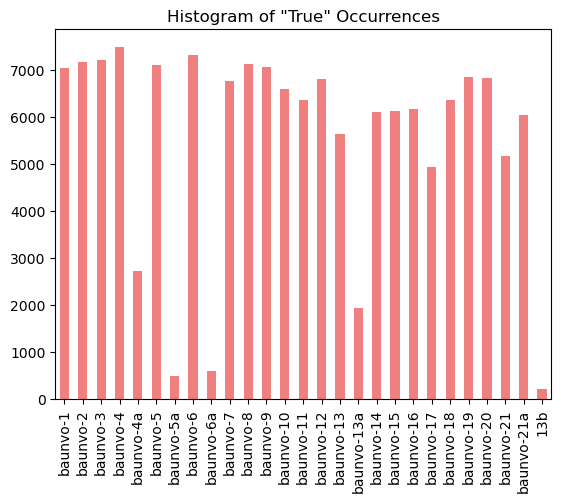

In [10]:
histogram_data = kw_exact_baunvo.iloc[:, 1:].sum()
histogram_data.plot(kind='bar', title='Histogram of "True" Occurrences', color='lightcoral')

#### Fuzzy keyword search results

In [11]:
kw_fuzzy = fuzzy_keyword()
kw_fuzzy.to_excel('data/nrw/clean/fuzzy_keyword_baunvo.xlsx')
kw_fuzzy.sample(5,random_state=42)

,Document ID,firsthöhe,geschossflächenzahl,grundflächenzahl,höhe baulicher anlagen,maximale gebäudehöhe,minimale gebäudehöhe,traufhöhe
8323,2405906_4.pdf,NaN,NaN,14 absatz 1 baunvo unzulässig. 4.2.2 außerhalb...,NaN,NaN,NaN,NaN
1346,2408169_3.pdf,18 baunvo) bezugspunkte zur bestimmung der höh...,NaN,NaN,NaN,NaN,NaN,NaN
11270,2370506_0.pdf,NaN,NaN,NaN,trauflänge gerechnet. die vorgenannten bauteil...,NaN,NaN,NaN
431,2395589_0.pdf,dachaufbauten grundsätzlich nur in horizontale...,NaN,NaN,NaN,NaN,NaN,NaN
9666,2412877_0.pdf,NaN,NaN,des räumlichen geltungsbereiches der 5. bebauu...,NaN,NaN,NaN,NaN


In [12]:
hochwasser_df = pd.read_json("data/nrw/bplan/features/keywords/fuzzy_search/keyword_dict_hochwasser.json")
desired_categories = ['hq100', 'hqhäufig', 'hqextrem', 
                      'vorranggebiete', 'vorbehaltsgebiete', 
                      'betroffen_von_überschwemmung']
hochwasser_df=hochwasser_df[
    hochwasser_df['category'].isin(desired_categories)
    ]
hochwasser_df.to_excel('data/nrw/clean/fuzzy_keyword_hochwasser.xlsx')
hochwasser_df.head(5)

,contextualised_keyword,actual_keyword,category,filename
0,zum teil in diesen hinein. erdgeschossfußböden...,hq100,hq100,1956227.pdf
1,nis im mai 2001 wurde die mauer auf beiden sei...,hq100,hq100,2369661_1.pdf
2,(hq 100) wahrscheinlichkeiten einer überschwem...,hq100,hq100,2373299_2.pdf
3,potenzielle gefahr eines hochwasserereignisses...,hq100,hq100,2376399.pdf
4,hqextrem: entspricht bis auf weitere überschwe...,hq100,hq100,2379698_0.pdf


<Axes: title={'center': 'Histogram of Categorical Occurrences'}>

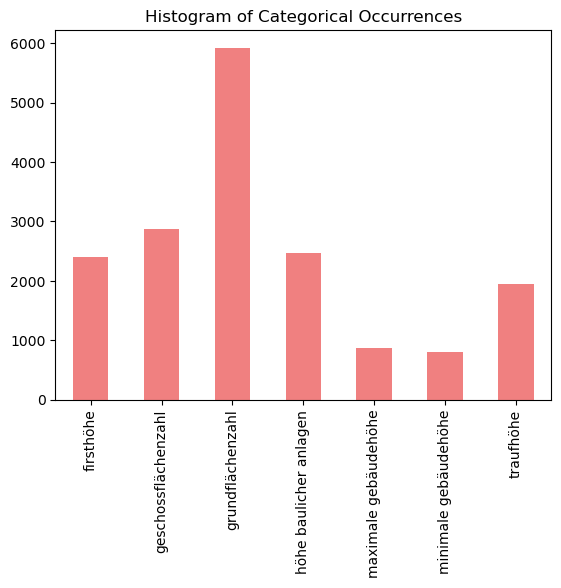

In [13]:
data_counts = kw_fuzzy.iloc[:, 1:].notna().sum()
data_counts.plot(kind='bar', title='Histogram of Categorical Occurrences', color='lightcoral')

### Knowledge agent
For a subsample of fuzzy keyword results, we run the text through GPT Turbo 3.5 to ask it to extract certain details. This table is the result of that experiment. 

In [14]:
ka = knowledge_agent()
ka.to_excel('data/nrw/clean/knowledge_agent.xlsx')
ka.head(5)

,id,th_input,th_agent_response,th_extracted_value,validation
0,id,traufhöhe,None,NaN,True
1,1956227.pdf,"/ fh 9,5 m bei gebäuden mit zwei vollgeschosse...","th: 6,5 m",6.5,True
2,1956230.pdf,anderes material zulässig. 2 dächer zulässig s...,None,NaN,True
3,2112722.pdf,zulhsige grundflächenzahl (grz) (gern.§ 16 (2)...,None,NaN,True
4,2112808.pdf,der außenflächen der außenwand mit der dachhau...,"th: 5,00 m",5.0,True


([<matplotlib.axis.YTick at 0x184d3949850>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2')])

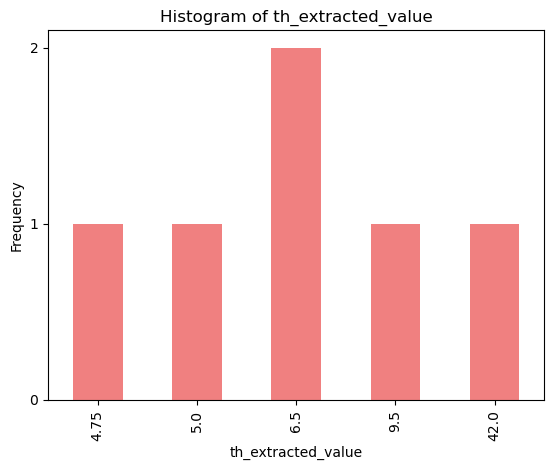

In [15]:
th_extracted_counts = ka['th_extracted_value'].dropna().value_counts()
th_extracted_counts_sorted = th_extracted_counts.sort_index()
ax = th_extracted_counts_sorted.plot(kind='bar', title='Histogram of th_extracted_value', color='lightcoral')
ax.set_xlabel('th_extracted_value')
ax.set_ylabel('Frequency')
plt.yticks(range(int(th_extracted_counts_sorted.max()) + 1))

## Missing Data Analysis at the Land Parcel Level

One of the analyses we conduct involves assessing the presence of B-plans and other pertinent documents in the land parcel entries on the [NRW Geoportal](https://www.geoportal.nrw/?activetab=portal). Specifically, we examine whether these documents are available as PDF files and adhere to the expected structure outlined on the website.

Below, we plot a map of NRW, color-coded to indicate the outcomes of our web scraping efforts. Successful extractions are depicted in one color, indicating that PDF files of building plans were obtained from the web portal. Conversely, failures are represented in another color, signifying instances where no PDF file was found or where the provided link diverged from the standardized format, leading to a different portal.

In [16]:
document_texts_df = document_texts(usecols=['land_parcel_id'])
land_parcels_gdf=land_parcels()

In [17]:
land_parcels_gdf['DownloadStatus_missing']=land_parcels_gdf[
    'Land Parcel ID'
    ].apply(
        lambda x: x in document_texts_df['Land Parcel ID'].values 
        )
print("This table contains", len(land_parcels_gdf), "land parcels")

This table contains 55836 land parcels


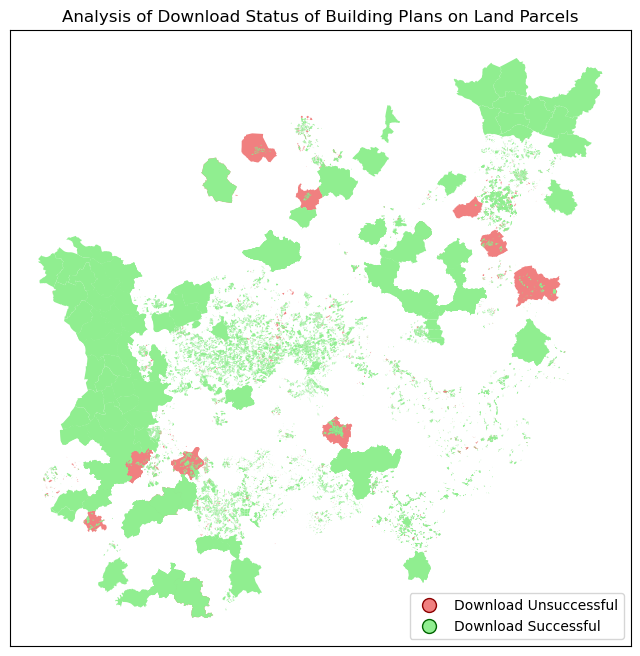

In [18]:
missing_true_gdf = land_parcels_gdf[
    land_parcels_gdf['DownloadStatus_missing'] 
                                    == True]
missing_false_gdf = land_parcels_gdf[
    land_parcels_gdf['DownloadStatus_missing'] == 
                                     False]
fig, ax = plt.subplots(figsize=(12, 8))

missing_true_gdf.plot(ax=ax, color='lightcoral', 
                      label='Download Unsuccessful')
missing_false_gdf.plot(ax=ax, color='lightgreen', 
                       label='Download Successful')

legend_labels = ['Download Unsuccessful', 'Download Successful']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='lightcoral', 
                             markersize=10, 
                             markeredgecolor='darkred'),
                  plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='lightgreen', 
                             markersize=10, 
                             markeredgecolor='darkgreen')]

ax.legend(legend_handles, legend_labels, loc='lower right')

ax.set_xticks([])
ax.set_yticks([])
ax.set_title(
    'Analysis of Download Status of Building Plans on Land Parcels'
    )
plt.show()

## Flooding Risk Analysis at the Land Parcel Level
Keywords in Question: 
1. hq100
2. hqhäufig
3. hqextrem
4. vorranggebiete
5. vorbehaltsgebiete
6. betroffen_von_überschwemmung

In [19]:
document_texts_df = document_texts()
combined_df = document_texts_df.merge(hochwasser_df, on='filename')
combined_df
joined_df = land_parcels_gdf.merge(combined_df, on='Land Parcel ID', 
                                   how='outer')
hochwasser_merged_df=joined_df

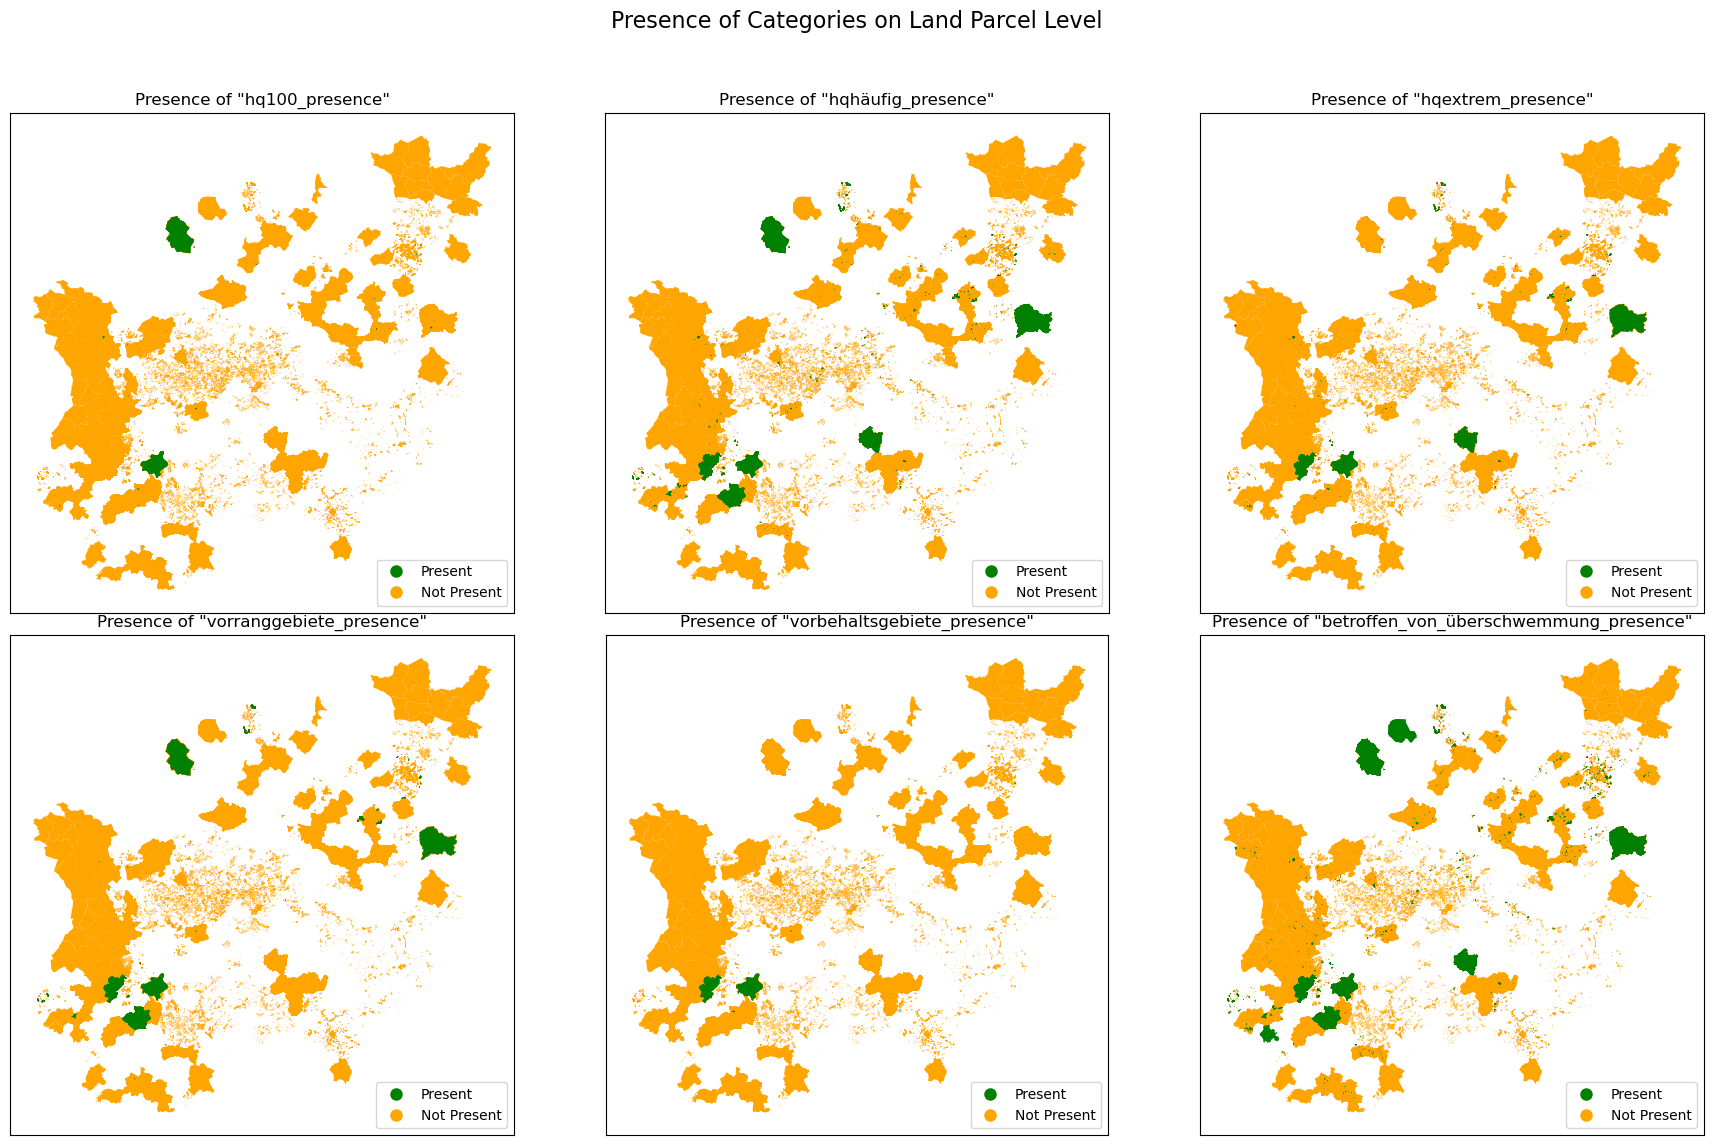

In [20]:
for category in desired_categories:
    column_name = f'{category}_presence'
    hochwasser_merged_df[column_name] = hochwasser_merged_df[
        'category'].str.contains(category, case=False, na=False)

presence_columns = ['hq100_presence', 'hqhäufig_presence', 
                    'hqextrem_presence',
                    'vorranggebiete_presence', 
                    'vorbehaltsgebiete_presence',
                    'betroffen_von_überschwemmung_presence']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Presence of Categories on Land Parcel Level', 
             fontsize=16)

for i, column_name in enumerate(presence_columns):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    hochwasser_merged_df[hochwasser_merged_df[column_name] == 
                         False].plot(ax=ax, color='orange', 
                                     markersize=10, label='Not Present'
                                     )
    hochwasser_merged_df[hochwasser_merged_df[column_name] == 
                         True].plot(ax=ax, color='green', 
                                    markersize=10, label='Present')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Presence of "{column_name}"')


legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='green', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='orange', markersize=10)]
legend_labels = ['Present', 'Not Present']

for ax in axes.flat:
    ax.legend(legend_handles, legend_labels, loc='lower right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Extract content from regional plans

To extract content from regional plans, i.e. parse the text from the pdfs and divide them into chapters / sections. This yields the `regional_plan_sections` dataset. Next, we can visualise keyword occurences. 

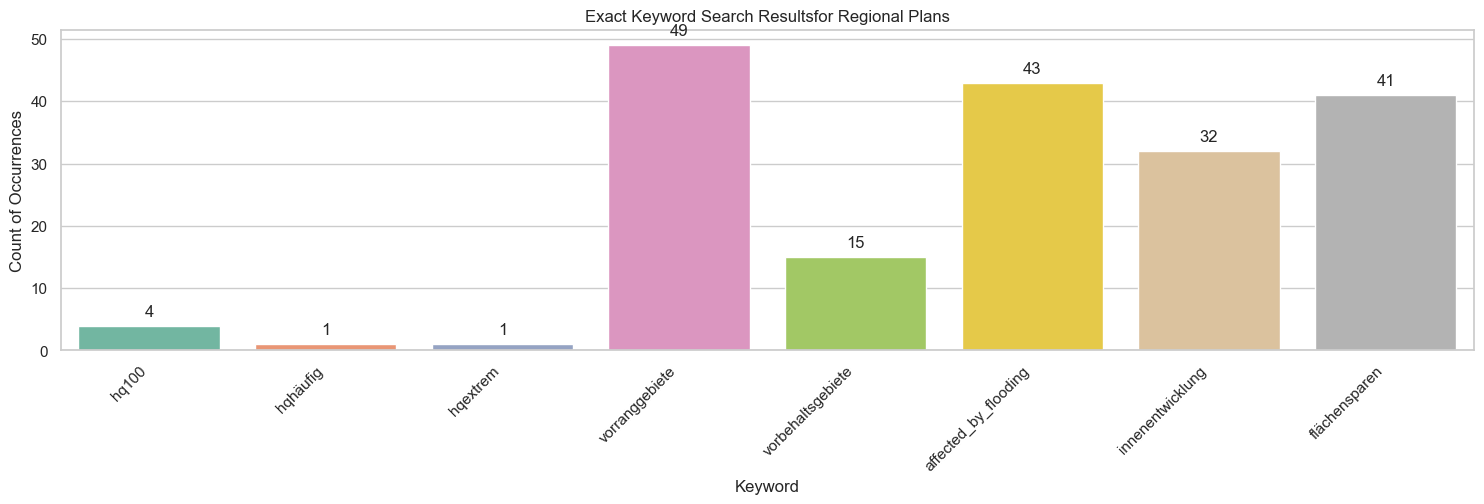

In [21]:
regional_plan_sections = pd.read_json("data/nrw/rplan/features/regional_plan_sections.json")
exact_result, exact_keywords = rplan_exact_keyword_search(input_df=regional_plan_sections)

plot_keyword_search_results(result_df=exact_result,
                            keyword_columns=exact_keywords,
                            title="Exact Keyword Search Results" 
                            "for Regional Plans")